In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
df=pd.read_csv('Titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
df.shape

(891, 12)

In [23]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [24]:
df.duplicated().sum()

0

In [25]:
s=df.isna().sum().sort_values(ascending=False)
s=s[s>0]
s

Cabin       687
Age         177
Embarked      2
dtype: int64

In [26]:
df.isnull().sum().sort_values(ascending=False)*100/len(df)

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

In [27]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [28]:
df.drop(columns='Cabin',inplace=True)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [29]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [30]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [31]:
df[['PassengerId','Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked']].nunique().sort_values()

Survived         2
Sex              2
Pclass           3
Embarked         3
SibSp            7
Parch            7
Age             89
Fare           248
Ticket         681
PassengerId    891
Name           891
dtype: int64

In [32]:
df.drop(columns=['PassengerId','Name','Ticket'],axis=1,inplace=True)
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [52]:
df.describe(include='O')

,Sex,Embarked
count,891,891
unique,2,3
top,male,S
freq,577,646


In [34]:
d1=df['Sex'].value_counts()
d1

Sex
male      577
female    314
Name: count, dtype: int64

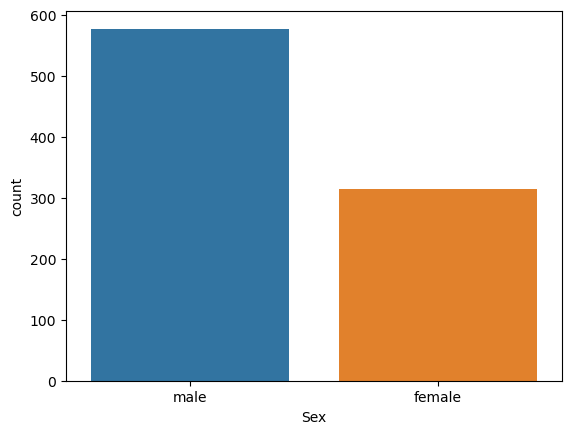

In [35]:
sns.countplot(x=df['Sex'])
plt.show()

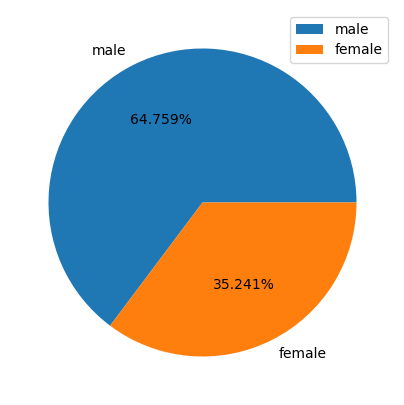

In [55]:
plt.figure(figsize=(5,5))
plt.pie(d1.values,labels=d1.index,autopct='%.3f%%')
plt.legend()
plt.show()

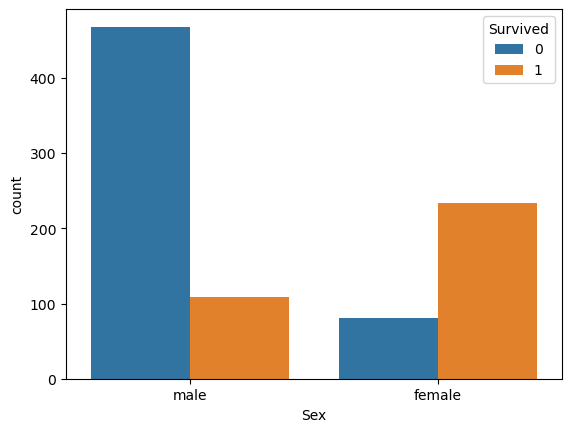

In [37]:
sns.countplot(x=df['Sex'],hue=df['Survived']) # In Sex (0 represents female and 1 represents male)
plt.show()

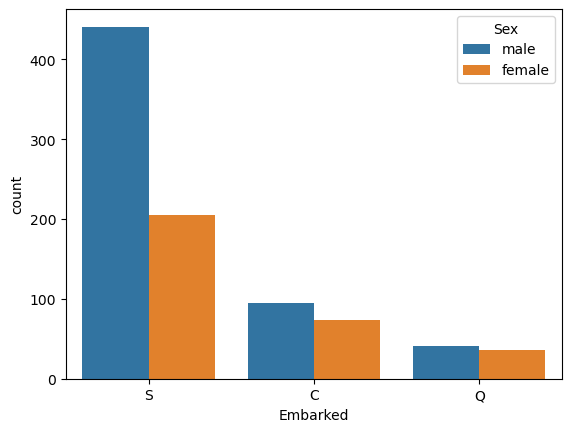

In [38]:
sns.countplot(x=df['Embarked'],hue=df['Sex'])
plt.show()

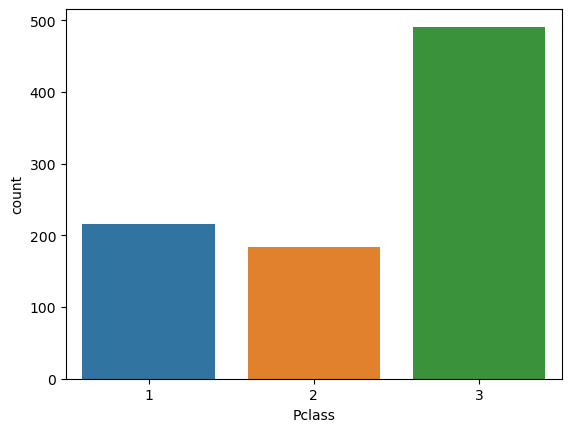

In [39]:
sns.countplot(x=df['Pclass'])
plt.show()

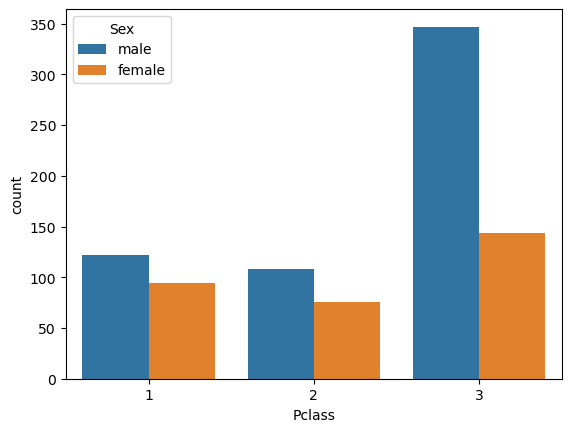

In [40]:
sns.countplot(x=df['Pclass'],hue=df['Sex'])
plt.show()

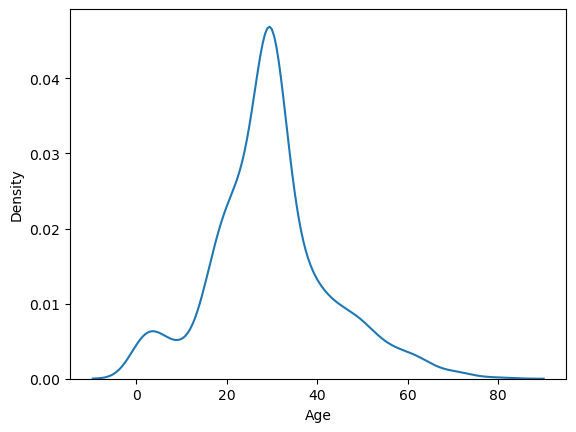

In [41]:
sns.kdeplot(x=df['Age'])
plt.show()

Survived
0    549
1    342
Name: count, dtype: int64


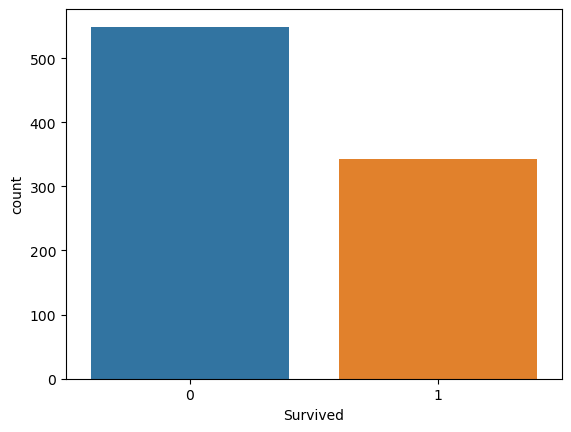

In [42]:
print(df['Survived'].value_counts())
sns.countplot(x=df['Survived'])
plt.show()

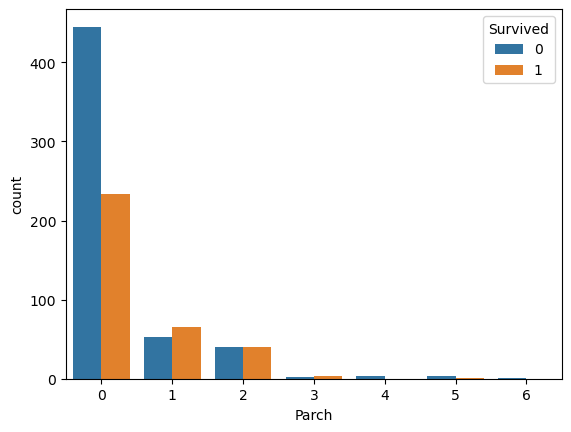

In [43]:
sns.countplot(x=df['Parch'],hue=df['Survived'])
plt.show()

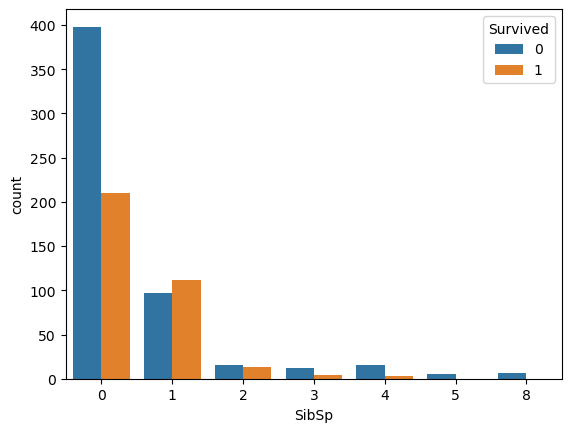

In [44]:
sns.countplot(x=df['SibSp'],hue=df['Survived'])
plt.show()

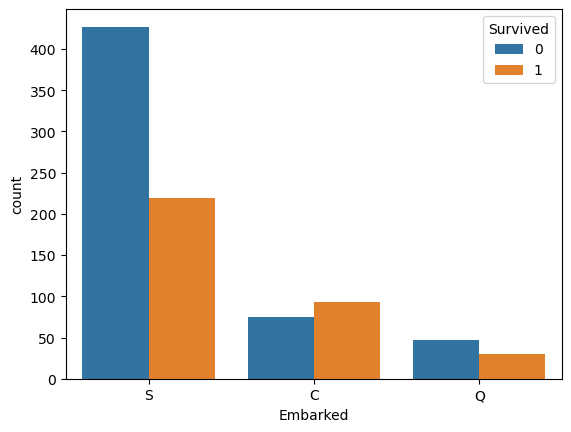

In [45]:
sns.countplot(x=df['Embarked'],hue=df['Survived'])
plt.show()

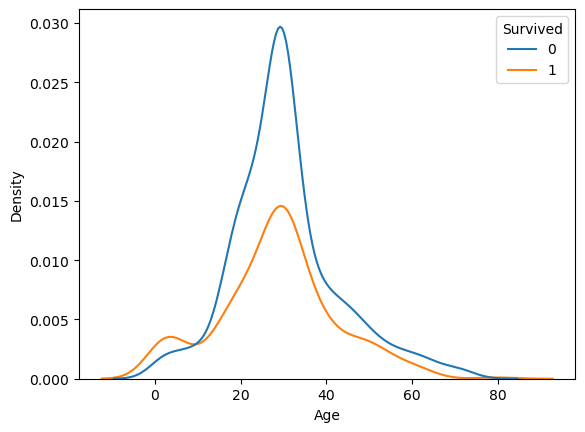

In [46]:
sns.kdeplot(x=df['Age'],hue=df['Survived'])
plt.show()

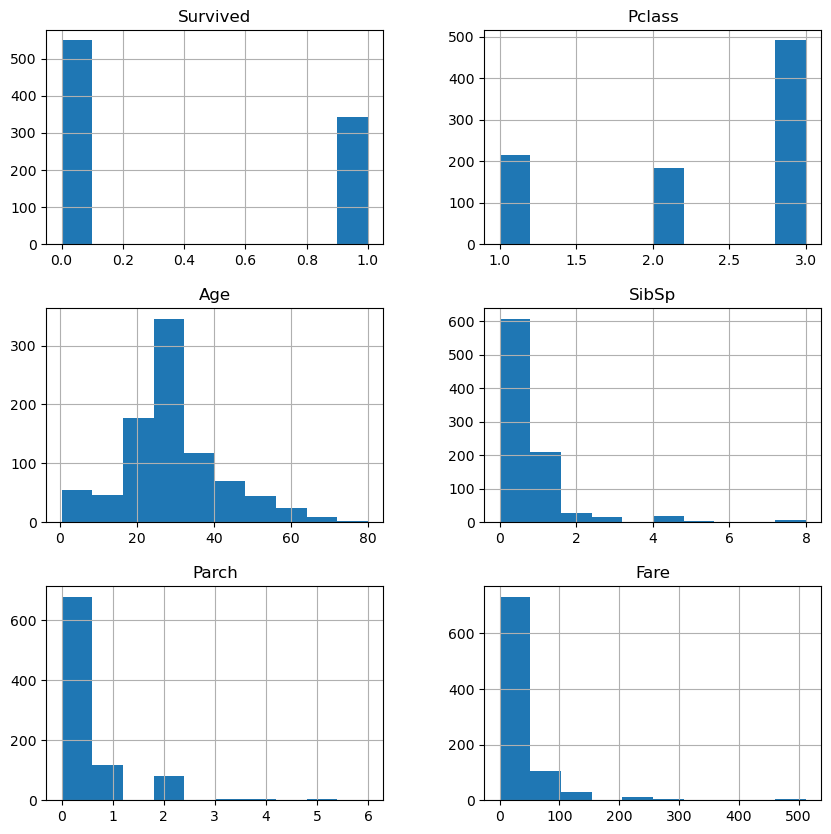

In [47]:
df.hist(figsize=(10,10))
plt.show()

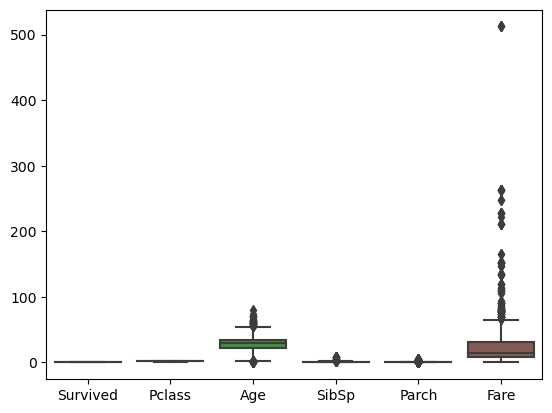

In [48]:
sns.boxplot(df)
plt.show()

In [62]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df['Sex']=label.fit_transform(df['Sex'])
df['Embarked']=label.fit_transform(df['Embarked'])

In [63]:
df['Sex'].unique()

array([1, 0], dtype=int64)

In [64]:
df['Embarked'].unique()

array([2, 0, 1])

In [65]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.162098
Sex,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,0.108262
Age,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.026749
SibSp,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.068230
Parch,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,0.039798
Fare,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.224719
Embarked,-0.167675,0.162098,0.108262,-0.026749,0.068230,0.039798,-0.224719,1.000000


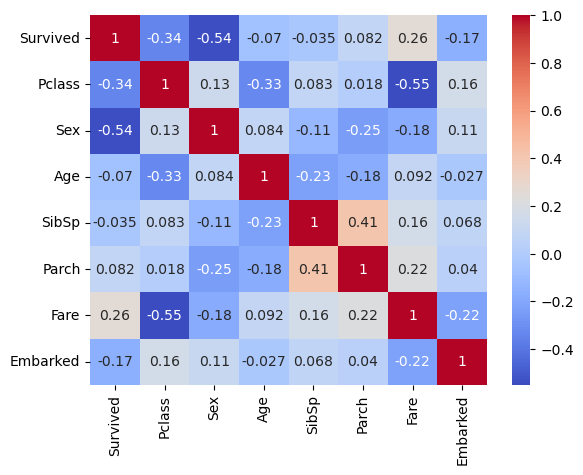

In [66]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

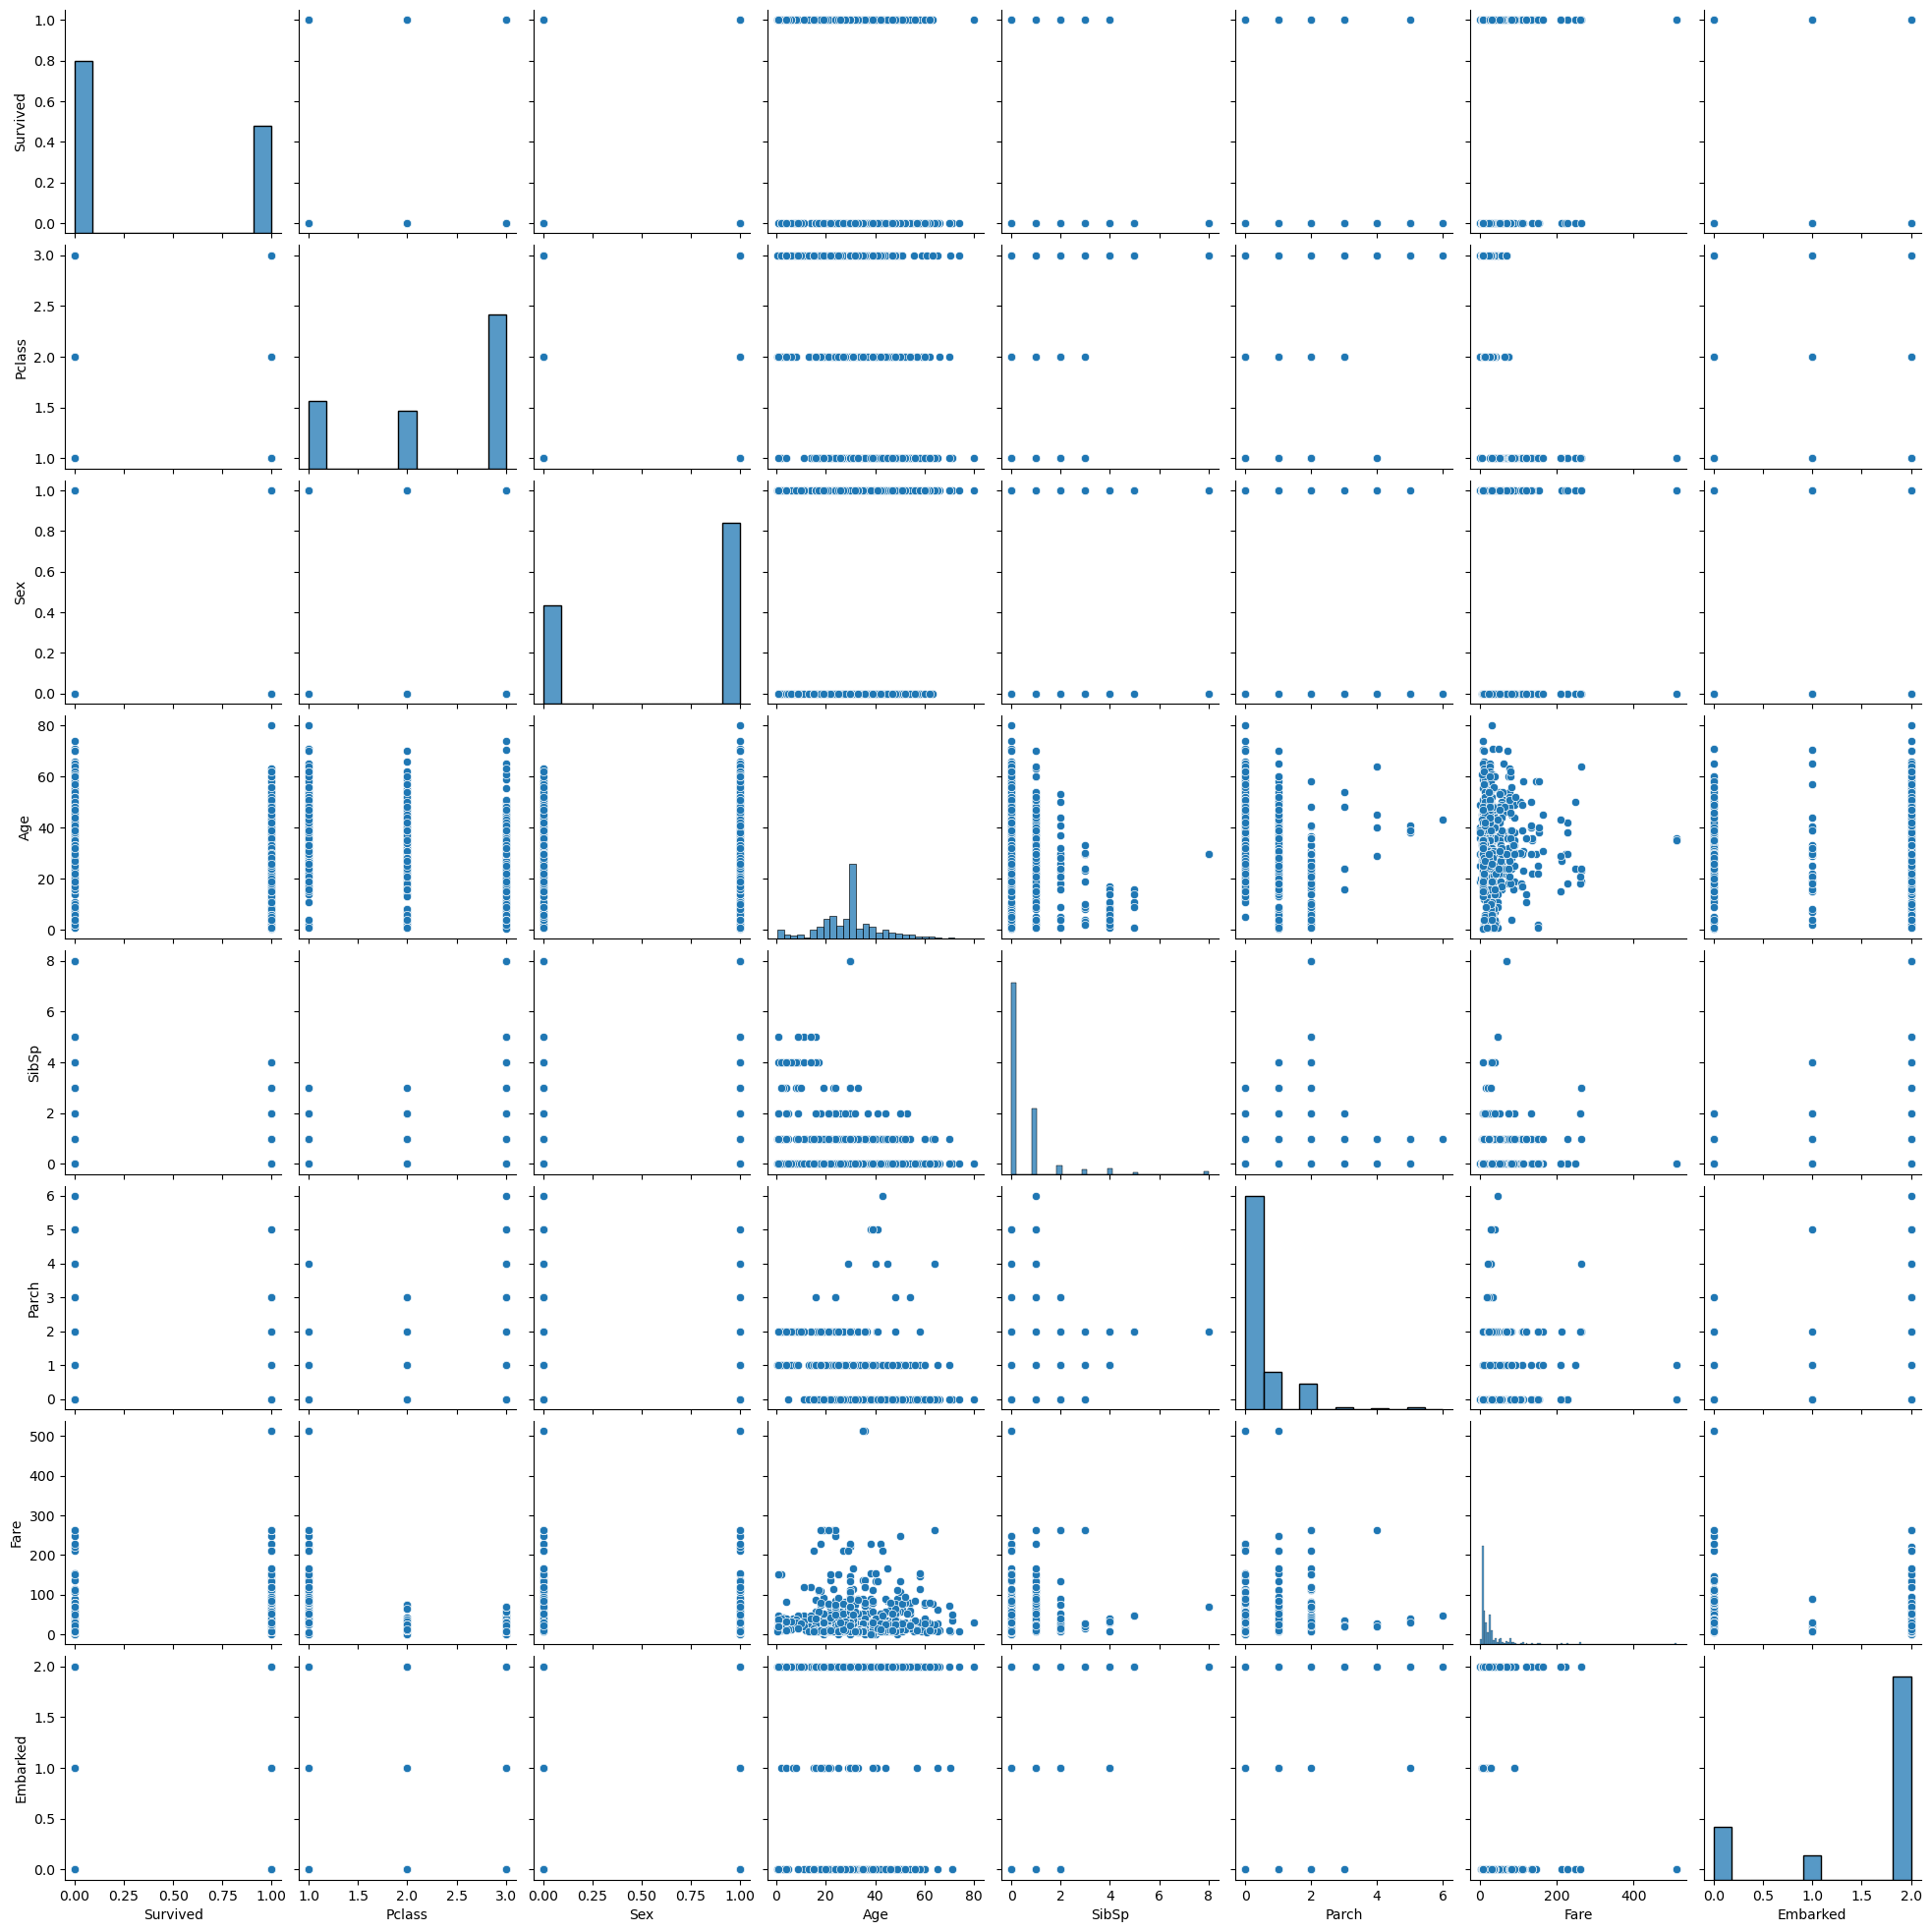

In [67]:
sns.pairplot(df)
plt.show()

In [68]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

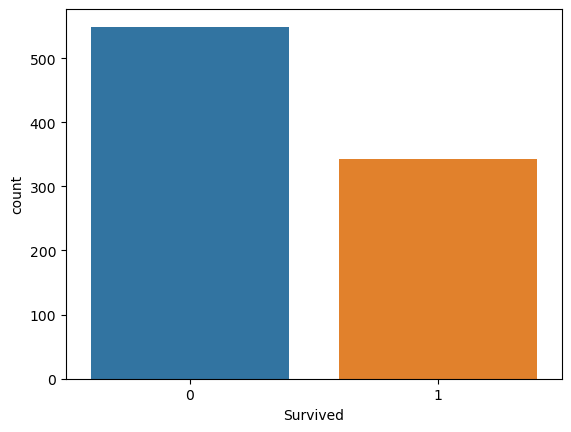

In [69]:
sns.countplot(x=df['Survived'])
plt.show()

In [70]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [71]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [72]:
cols = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
x = df[cols]
y = df['Survived']
print(x.shape)
print(y.shape)
print(type(x))  # DataFrame
print(type(y)) 

(891, 7)
(891,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [73]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [74]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [75]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.10,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(801, 7)
(90, 7)
(801,)
(90,)


In [76]:
def cls_eval(ytest,ypred):
    cm = confusion_matrix(ytest,ypred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',classification_report(ytest,ypred))

def mscore(model):
    print('Training Score',model.score(x_train,y_train))  # Training Accuracy
    print('Testing Score',model.score(x_test,y_test))  # Testing Accuracy

In [77]:
lr = LogisticRegression(max_iter=1000,solver='liblinear')
lr.fit(x_train,y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [78]:
mscore(lr)

Training Score 0.8052434456928839
Testing Score 0.7666666666666667


In [79]:
ypred_lr = lr.predict(x_test)
print(ypred_lr)

[1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]


In [80]:
cls_eval(y_test,ypred_lr)
acc_lr = accuracy_score(y_test,ypred_lr)
print('Accuracy Score',acc_lr)

Confusion Matrix
 [[46  7]
 [14 23]]
Classification Report
               precision    recall  f1-score   support

           0       0.77      0.87      0.81        53
           1       0.77      0.62      0.69        37

    accuracy                           0.77        90
   macro avg       0.77      0.74      0.75        90
weighted avg       0.77      0.77      0.76        90

Accuracy Score 0.7666666666666667


In [81]:
# Building the knnClassifier Model
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [82]:
# Computing Training and Testing score
mscore(knn)

Training Score 0.7752808988764045
Testing Score 0.6777777777777778


In [83]:
# Generating Prediction
ypred_knn = knn.predict(x_test)
print(ypred_knn)

[1 0 0 1 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1
 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0]


In [84]:
# Evaluate the model - confusion matrix, classification Report, Accuracy score
cls_eval(y_test,ypred_knn)
acc_knn = accuracy_score(y_test,ypred_knn)
print('Accuracy Score',acc_knn)

Confusion Matrix
 [[47  6]
 [23 14]]
Classification Report
               precision    recall  f1-score   support

           0       0.67      0.89      0.76        53
           1       0.70      0.38      0.49        37

    accuracy                           0.68        90
   macro avg       0.69      0.63      0.63        90
weighted avg       0.68      0.68      0.65        90

Accuracy Score 0.6777777777777778


In [85]:
# Building Support Vector Classifier Model
svc = SVC(C=1.0)
svc.fit(x_train, y_train)

SVC()

In [86]:
# Computing Training and Testing score
mscore(svc)

Training Score 0.6891385767790262
Testing Score 0.6333333333333333


In [87]:
# Generating Prediction
ypred_svc = svc.predict(x_test)
print(ypred_svc)

[0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0]


In [88]:
# Evaluate the model - confusion matrix, classification Report, Accuracy score
cls_eval(y_test,ypred_svc)
acc_svc = accuracy_score(y_test,ypred_svc)
print('Accuracy Score',acc_svc)

Confusion Matrix
 [[48  5]
 [28  9]]
Classification Report
               precision    recall  f1-score   support

           0       0.63      0.91      0.74        53
           1       0.64      0.24      0.35        37

    accuracy                           0.63        90
   macro avg       0.64      0.57      0.55        90
weighted avg       0.64      0.63      0.58        90

Accuracy Score 0.6333333333333333


In [89]:
# Building the RandomForest Classifier Model
rfc=RandomForestClassifier(n_estimators=80,criterion='entropy',min_samples_split=5,max_depth=10)
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=5,
                       n_estimators=80)

In [90]:
# Computing Training and Testing score
mscore(rfc)

Training Score 0.916354556803995
Testing Score 0.7555555555555555


In [91]:
ypred_rfc = rfc.predict(x_test)
print(ypred_rfc)

[1 0 1 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 1
 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]


In [92]:
cls_eval(y_test,ypred_rfc)
acc_rfc = accuracy_score(y_test,ypred_rfc)
print('Accuracy Score',acc_rfc)

Confusion Matrix
 [[47  6]
 [16 21]]
Classification Report
               precision    recall  f1-score   support

           0       0.75      0.89      0.81        53
           1       0.78      0.57      0.66        37

    accuracy                           0.76        90
   macro avg       0.76      0.73      0.73        90
weighted avg       0.76      0.76      0.75        90

Accuracy Score 0.7555555555555555


In [93]:
# Building the DecisionTree Classifier Model
dt = DecisionTreeClassifier(max_depth=5,criterion='entropy',min_samples_split=10)
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10)

In [94]:
# Computing Training and Testing score
mscore(dt)

Training Score 0.8526841448189763
Testing Score 0.7777777777777778


In [95]:
# Generating Prediction
ypred_dt = dt.predict(x_test)
print(ypred_dt)

[1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1
 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]


In [96]:
# Evaluate the model - confusion matrix, classification Report, Accuracy score
cls_eval(y_test,ypred_dt)
acc_dt = accuracy_score(y_test,ypred_dt)
print('Accuracy Score',acc_dt)

Confusion Matrix
 [[46  7]
 [13 24]]
Classification Report
               precision    recall  f1-score   support

           0       0.78      0.87      0.82        53
           1       0.77      0.65      0.71        37

    accuracy                           0.78        90
   macro avg       0.78      0.76      0.76        90
weighted avg       0.78      0.78      0.77        90

Accuracy Score 0.7777777777777778


In [97]:
# Builing the Adaboost model
ada_boost  = AdaBoostClassifier(n_estimators=80)
ada_boost.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=80)

In [98]:
# Computing the Training and Testing Score
mscore(ada_boost)

Training Score 0.8564294631710362
Testing Score 0.7666666666666667


In [99]:
ypred_ada_boost = ada_boost.predict(x_test)

In [100]:
cls_eval(y_test,ypred_ada_boost)
acc_adab = accuracy_score(y_test,ypred_ada_boost)
print('Accuracy Score',acc_adab)

Confusion Matrix
 [[45  8]
 [13 24]]
Classification Report
               precision    recall  f1-score   support

           0       0.78      0.85      0.81        53
           1       0.75      0.65      0.70        37

    accuracy                           0.77        90
   macro avg       0.76      0.75      0.75        90
weighted avg       0.77      0.77      0.76        90

Accuracy Score 0.7666666666666667


In [101]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','knn','SVC','Random Forest Classifier','Decision Tree Classifier','Ada Boost Classifier'],
    'Score': [acc_lr,acc_knn,acc_svc,acc_rfc,acc_dt,acc_adab]})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
4,Decision Tree Classifier,0.777778
0,Logistic Regression,0.766667
5,Ada Boost Classifier,0.766667
3,Random Forest Classifier,0.755556
1,knn,0.677778
2,SVC,0.633333


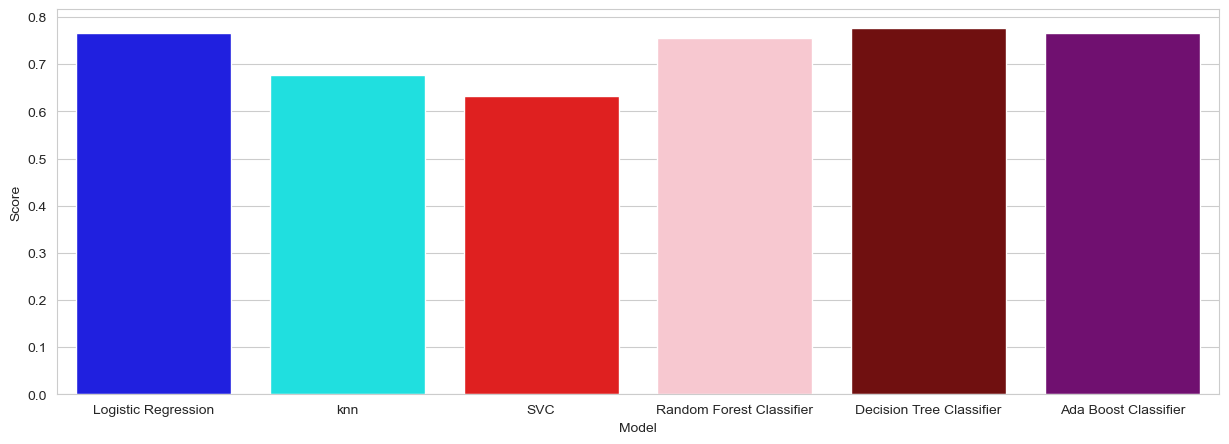

In [105]:
colors = ["blue", "cyan", "red", "pink","maroon","purple"]

sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'],y=models['Score'], palette=colors )
plt.show()

In [110]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)
predictions = model.predict(x_test)

In [111]:
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7666666666666667


In [115]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81        53
           1       0.75      0.65      0.70        37

    accuracy                           0.77        90
   macro avg       0.76      0.75      0.75        90
weighted avg       0.77      0.77      0.76        90



In [116]:
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, x_train, y_train, cv=10, scoring = "accuracy")

In [117]:
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.81481481 0.775      0.7625     0.7625     0.775      0.85
 0.8375     0.825      0.8875     0.8125    ]
Mean: 0.8102314814814815
Standard Deviation: 0.03947011097645694


In [120]:
random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(x_train, y_train)

Y_prediction = random_forest.predict(x_test)

random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)

# Print scores
print(round(acc_random_forest,2,), "%")

98.25 %


In [122]:
importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

In [123]:
importances.head()

,importance
feature,
Sex,0.273
Fare,0.258
Age,0.251
Pclass,0.091
SibSp,0.050


In [124]:
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 81.02000000000001 %


In [125]:
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [127]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [400,450,500,550],
               'criterion':['gini','entropy'],
               'bootstrap': [True],
               'max_depth': [15, 20, 25],
               'max_features': ['auto','sqrt', 10],
               'min_samples_leaf': [2,3],
               'min_samples_split': [2,3]}
                                  
clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(x_train,y_train)

# Print score
clf_performance(best_clf_rf,'Random Forest')

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Random Forest
Best Score: 0.8389751552795032
Best Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 15, 'max_features': 10, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 400}
